<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


### 0. Imports

In [88]:
# data processing
# ---------------------------------------------------------
import pandas as pd
import numpy as np 

# preprocessing and ML
# ---------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler, RobustScaler

# data viz
# ---------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Importar datos del anterior notebook

In [89]:
autorenew_df = pd.read_csv("../datos/autorenew_sinnulos.csv",index_col=0)
autorenew_df

,index,datecrawled,price,abtest,vehicletype,yearofregistration,gearbox,powercv,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,postalcode,lastseen,fueltype_grouped,brand_grouped
0,0.0,2016-03-24 11:52:17,480.0,test,coupe,1993.0,manually,89.0,golf,150000.0,0.0,petrol,volkswagen,no,2016-03-24,70435,2016-04-07 03:16:57,petrol,volkswagen
1,1.0,2016-03-24 10:58:45,18300.0,test,coupe,2011.0,manually,187.0,c2,125000.0,5.0,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50,diesel,audi
2,2.0,2016-03-14 12:52:21,9800.0,test,suv,2004.0,automatic,161.0,grand,125000.0,8.0,diesel,jeep,no,2016-03-14,90480,2016-04-05 12:47:46,diesel,other
3,3.0,2016-03-17 16:54:04,1500.0,test,small car,2001.0,manually,74.0,golf,150000.0,6.0,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,petrol,volkswagen
4,4.0,2016-03-31 17:25:20,3600.0,test,small car,2008.0,manually,68.0,fabia,90000.0,7.0,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,diesel,skoda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360740,371523.0,2016-03-14 17:48:27,2200.0,test,convertible,2005.0,automatic,111.7,impreza,20000.0,1.0,hybrid,sonstige_autos,no,2016-03-14,39576,2016-04-06 00:46:52,other,other
360741,371524.0,2016-03-05 19:56:21,1199.0,test,convertible,2000.0,automatic,100.0,fortwo,125000.0,3.0,petrol,smart,no,2016-03-05,26135,2016-03-11 18:17:12,petrol,smart
360742,371525.0,2016-03-19 18:57:12,9200.0,test,bus,1996.0,manually,101.0,transporter,150000.0,3.0,diesel,volkswagen,no,2016-03-19,87439,2016-04-07 07:15:26,diesel,volkswagen
360743,371526.0,2016-03-20 19:41:08,3400.0,test,combi,2002.0,manually,99.0,golf,150000.0,6.0,diesel,volkswagen,no,2016-03-20,40764,2016-03-24 12:45:21,diesel,volkswagen


## 2. Escalado de variables numéricas

Aunque tendría, seguramente, que hacer una transformación o bien en agrupamiento categórico o bien según la temporalidad de las variables yearofregistration o monthofregistration, se añaden al ejercicio. La variable price no tiene sentido real introducirla para este tratamiento, ya que su escalado no influye en el modelo.

In [90]:
columnas_tratar = ["powercv","kilometer","yearofregistration","monthofregistration"]

scalers = {
    "minmax": MinMaxScaler(),
    "standard": StandardScaler(),
    "robust": RobustScaler()
}

for scaler_name, scaler in scalers.items():
    columnas_tratar_scaler = [f"{columna}_{scaler_name}" for columna in columnas_tratar]
    autorenew_df[columnas_tratar_scaler] = scaler.fit_transform(autorenew_df[columnas_tratar])

columnas_plain = [col + "_plain" for col in columnas_tratar]
autorenew_df[columnas_plain] = autorenew_df[columnas_tratar]

Tras el escalado, agrupamos por transformación y sacamos el sumario descriptivo de dicho dataframe para observar bien los estadísticos de cada una.

In [91]:
autorenew_df_tratamiento = autorenew_df[[col for col in autorenew_df.columns if any([col.endswith(nombre) or col.endswith("plain") for nombre in scalers.keys()])]]
comparativa = autorenew_df_tratamiento.describe().T.sort_index(key=lambda x: x.str.split('_').str[-1])

comparativa = comparativa.drop(columns="count").assign(rango=lambda row: row["max"]-row["min"], iqr=lambda row: row["75%"]-row["25%"])
comparativa.round(3)

,mean,std,min,25%,50%,75%,max,rango,iqr
powercv_minmax,0.006,0.010,0.000,0.004,0.006,0.007,1.000,1.000,0.003
kilometer_minmax,0.832,0.275,0.000,0.655,1.000,1.000,1.000,1.000,0.345
yearofregistration_minmax,0.857,0.070,0.000,0.817,0.862,0.899,1.000,1.000,0.083
monthofregistration_minmax,0.483,0.307,0.000,0.250,0.500,0.750,1.000,1.000,0.500
powercv_plain,127.081,190.813,1.000,79.000,111.000,148.000,19726.000,19725.000,69.000
kilometer_plain,125661.756,39836.468,5000.000,100000.000,150000.000,150000.000,150000.000,145000.000,50000.000
yearofregistration_plain,2003.444,7.631,1910.000,1999.000,2004.000,2008.000,2019.000,109.000,9.000
monthofregistration_plain,5.795,3.685,0.000,3.000,6.000,9.000,12.000,12.000,6.000
powercv_robust,0.233,2.765,-1.594,-0.464,0.000,0.536,284.275,285.870,1.000
kilometer_robust,-0.487,0.797,-2.900,-1.000,0.000,0.000,0.000,2.900,1.000


Es más cómodo observar los datos directamente de forma visual. Para poder compartir el eje Y fácilmente solo a nivel de transformación, se utilizan subplots diferentes.

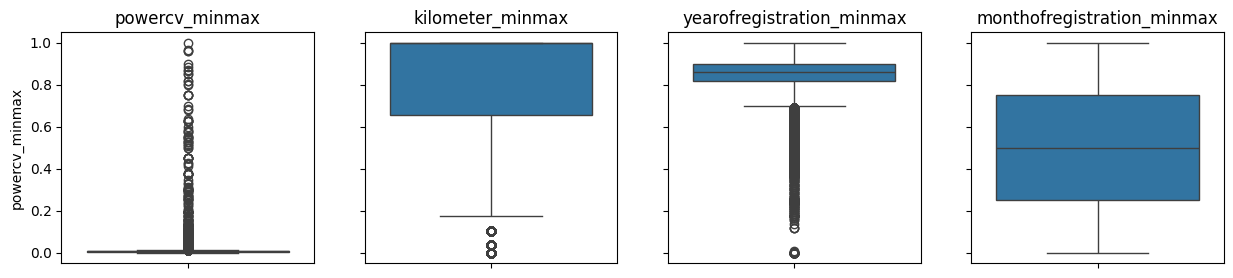

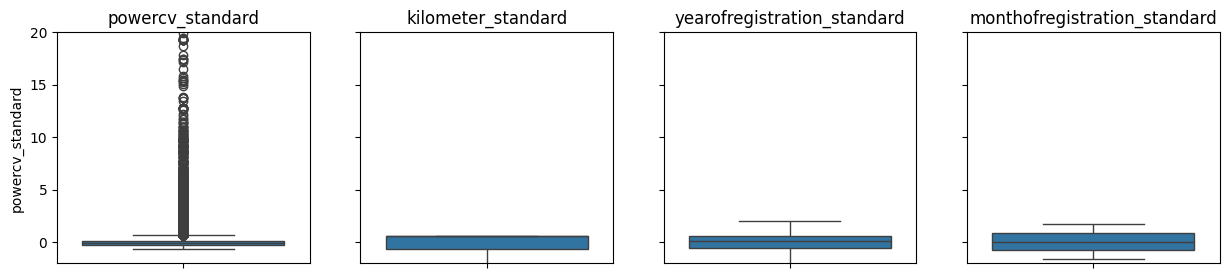

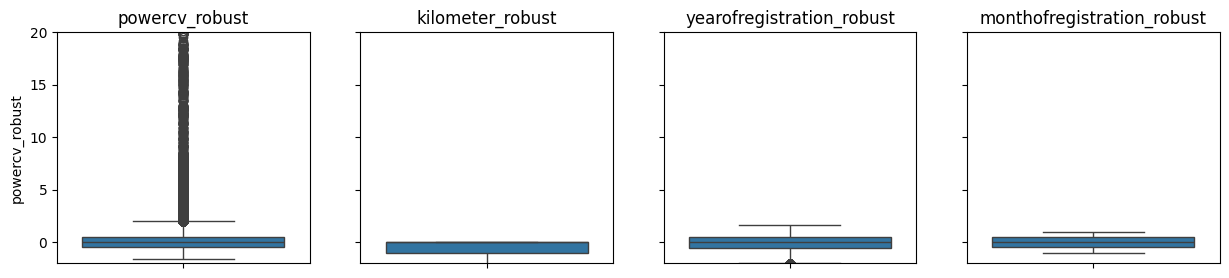

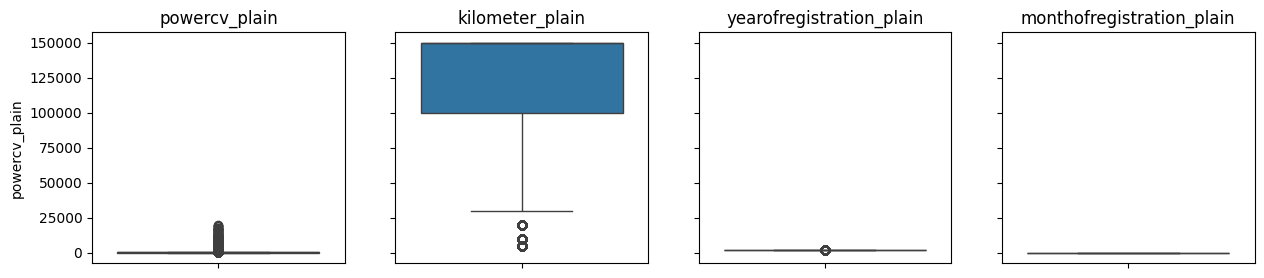

In [92]:
tratamientos = list(scalers.keys())
tratamientos.append("plain")

for tratamiento in tratamientos:
    fig, axes = plt.subplots(1,4, figsize=(15,3), sharey=True)
    columnas_escaladas = [col for col in autorenew_df_tratamiento.columns if col.endswith(tratamiento)]
    for ax, columna in zip(axes.flat, columnas_escaladas):
        sns.boxplot(
            data=autorenew_df_tratamiento,
            y=columna,
            ax=ax
        )
        ax.set_title(columna)
        if tratamiento in ["robust","standard"]:
            ax.set_ylim(-2,20)
    plt.show()

El standard y robust scaler escalan manteniendo de forma más equitativa los datos que el minmax scaler, dejando cerca del mismo rango a todas las variables. El minmax_scaler modifica mucho la equivalencia entre valores del mismo dataset, por lo que no es recomendable usarlo.

Para elegir entre standard y robust_scaler, podemos centrarnos en esas transformaciones del ``describe()``:

In [93]:
comparativa = comparativa.round(3).reset_index()
comparativa[comparativa["index"].str.endswith("robust") | comparativa["index"].str.endswith("standard")]

,index,mean,std,min,25%,50%,75%,max,rango,iqr
8,powercv_robust,0.233,2.765,-1.594,-0.464,0.000,0.536,284.275,285.870,1.000
9,kilometer_robust,-0.487,0.797,-2.900,-1.000,0.000,0.000,0.000,2.900,1.000
10,yearofregistration_robust,-0.062,0.848,-10.444,-0.556,0.000,0.444,1.667,12.111,1.000
11,monthofregistration_robust,-0.034,0.614,-1.000,-0.500,0.000,0.500,1.000,2.000,1.000
12,powercv_standard,-0.000,1.000,-0.661,-0.252,-0.084,0.110,102.713,103.374,0.362
13,kilometer_standard,-0.000,1.000,-3.029,-0.644,0.611,0.611,0.611,3.640,1.255
14,yearofregistration_standard,-0.000,1.000,-12.246,-0.582,0.073,0.597,2.039,14.284,1.179
15,monthofregistration_standard,0.000,1.000,-1.573,-0.759,0.056,0.870,1.684,3.257,1.628


Teniendo en cuenta que el objetivo para este escalado es tener un rango homogéneo entre las variables conservando la extremidad de los valores atípicos, es interesante concentrarse en el IQR y el rango total. Fijándonos en el IQR de las variables escaladas con RobustScaler, el IQR de todas es el mismo, 1, mientras que el rango total es mucho más variable. En cambio, el IQR de las del StandardScaler no muestra un rango igual de equivalente, mientras que el rango de powercv se ha reducido má de un 60%.

Por lo tanto, la decisión es la de utilizar el RobustScaler para escalar las variables de este conjunto.